In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv
/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke.R


In [2]:
games = pd.read_csv("../input/nfl-scores-and-betting-data/spreadspoke_scores.csv")

In [3]:
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [4]:
games_2010s = games[ games.schedule_season > 2009]

games_2010s.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10008,9/9/2010,2010,1,False,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME
10009,9/12/2010,2010,1,False,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN
10010,9/12/2010,2010,1,False,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN
10011,9/12/2010,2010,1,False,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof)
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN


In [5]:
games_2010s.groupby('weather_detail').size()

weather_detail
DOME                    802
DOME (Open Roof)         56
Fog                      25
Rain                    101
Rain | Fog               18
Snow                     13
Snow | Fog                5
Snow | Freezing Rain      1
dtype: int64

<AxesSubplot:xlabel='score_away', ylabel='score_home'>

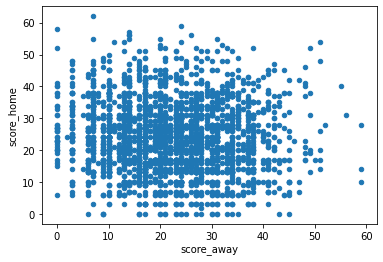

In [6]:
games_2010s.plot(kind = 'scatter', x = 'score_away', y = 'score_home')

In [7]:
games_2010s["total_pts"] = games_2010s.score_home + games_2010s.score_away
games_2010s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_pts
10008,9/9/2010,2010,1,False,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME,23
10009,9/12/2010,2010,1,False,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN,25
10010,9/12/2010,2010,1,False,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN,33
10011,9/12/2010,2010,1,False,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof),58
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,1/9/2022,2021,18,False,Los Angeles Rams,24,27,San Francisco 49ers,SF,-3.5,46.5,SoFi Stadium,False,72.0,0.0,NaN,DOME,51
13215,1/9/2022,2021,18,False,Miami Dolphins,33,24,New England Patriots,NE,-6.0,41,Hard Rock Stadium,False,75.0,8.0,79.0,NaN,57
13216,1/9/2022,2021,18,False,Minnesota Vikings,31,17,Chicago Bears,MIN,-3.5,44.5,U.S. Bank Stadium,False,72.0,0.0,NaN,DOME,48
13217,1/9/2022,2021,18,False,New York Giants,7,22,Washington Football Team,WAS,-6.0,36,MetLife Stadium,False,38.0,0.0,64.0,NaN,29


<AxesSubplot:xlabel='weather_wind_mph', ylabel='total_pts'>

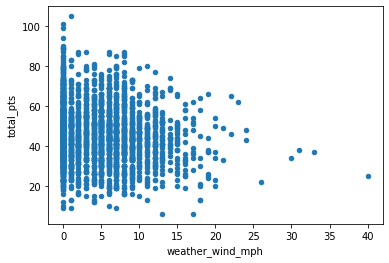

In [8]:
games_2010s.plot(kind = 'scatter', x = 'weather_wind_mph', y = 'total_pts')